In [4]:
# this was all done in vscode connected to fe server
import os
import cv2
import pickle
import numpy as np
import polars as pl
import pandas as pd

from collections import Counter
from tqdm import tqdm

cwd = os.getcwd()
data_dir = "/home/steffenm/data/cv/dataset"

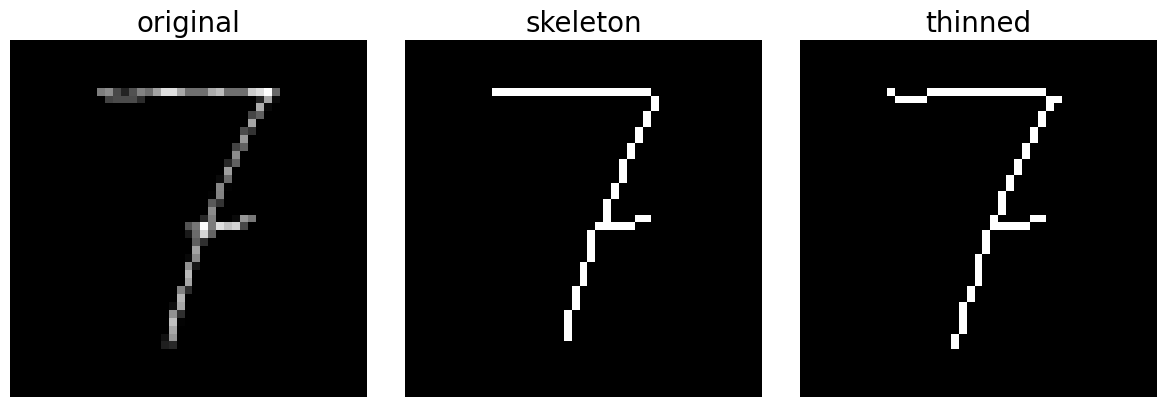

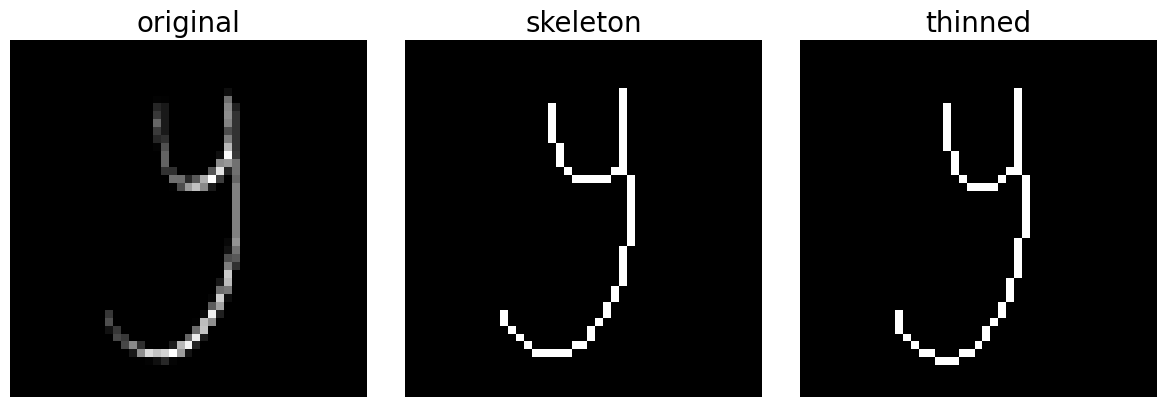

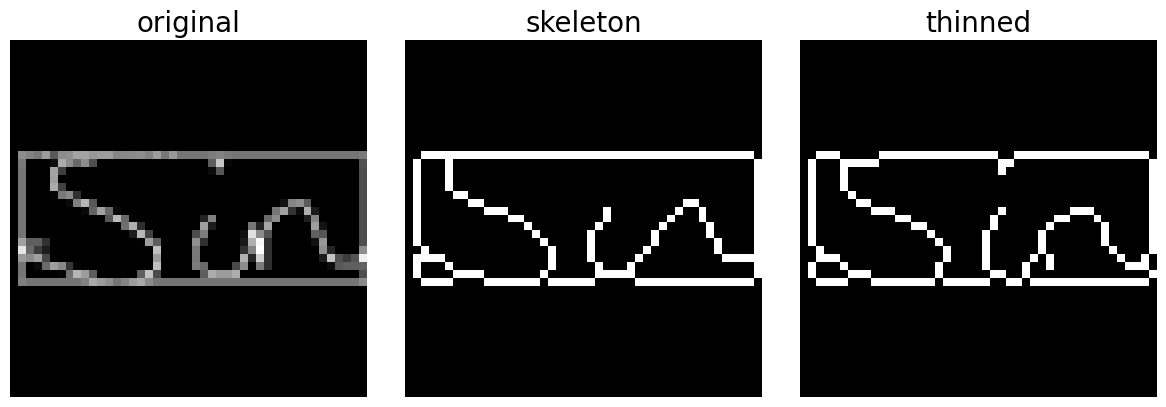

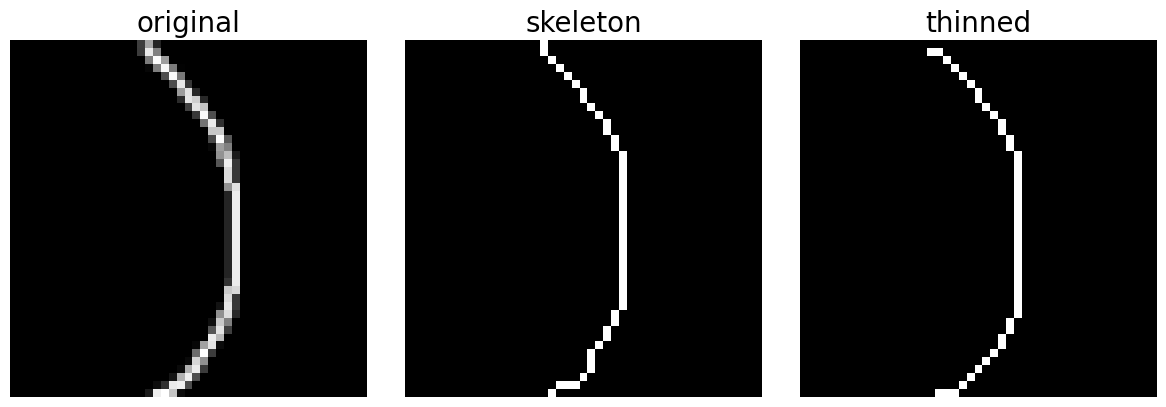

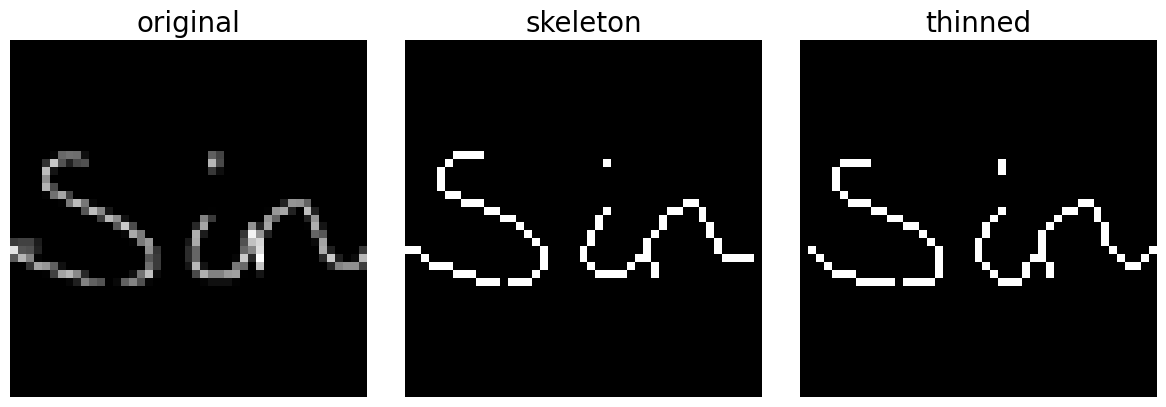

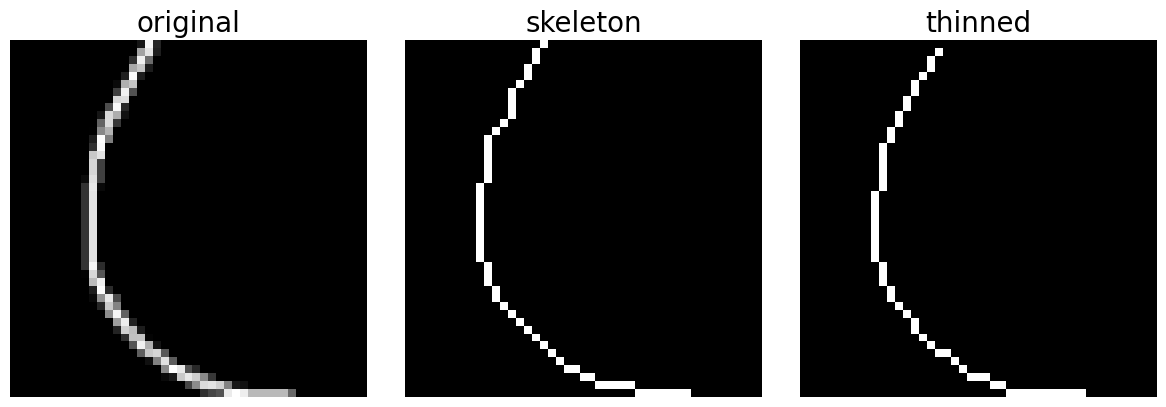

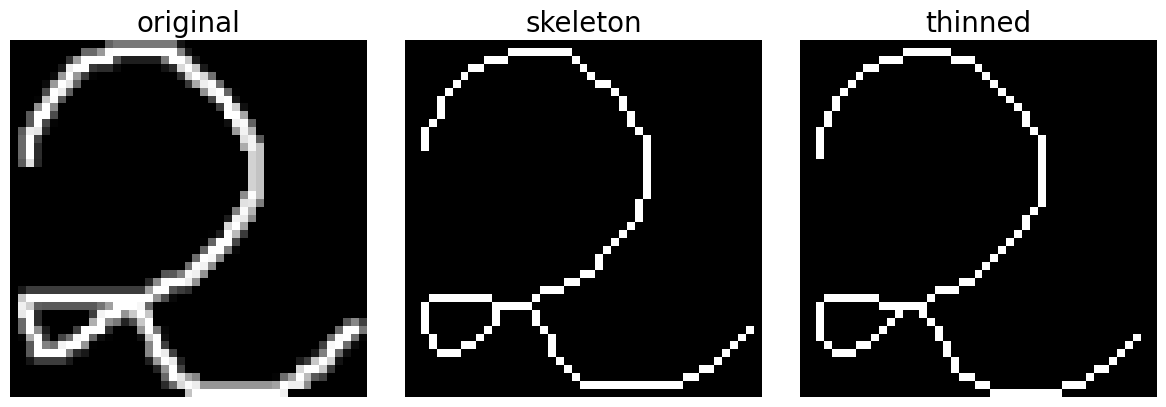

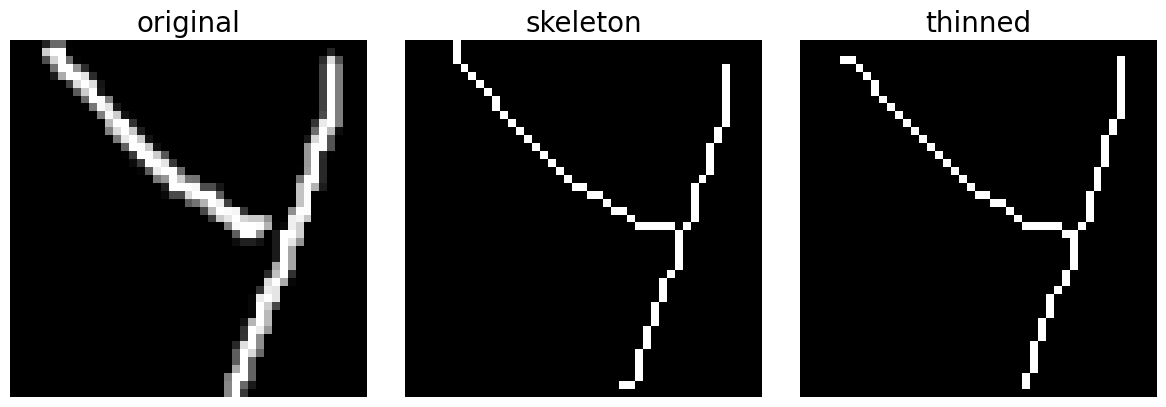

In [94]:
from skimage.morphology import skeletonize, thin, medial_axis
from skimage import data
import skimage
import matplotlib.pyplot as plt
from skimage.util import invert

def classify_image(test_image_path, data_dir):
    #class_names_map = pickle.load(open(os.path.join(data_dir, "class_names_map.pkl"), "rb"))

    # Load the model
    #model = pickle.load(open(os.path.join(data_dir, "tm_trained.pkl"), "rb"))

    # Load the test image
    test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
    #plt.imshow(test_image, cmap='gray')
    #plt.show()

    h, w = test_image.shape[:2]
    aspect = w / h
    desired_size = 45

    test_image = cv2.threshold(test_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # PADDING
    if aspect != 1:
        if aspect > 1:
            pad_vert = (w - h) // 2
            pad_horiz = 0
        else:
            pad_vert = 0
            pad_horiz = (h - w) // 2
        
        # Pad the image to make it square
        test_image = cv2.copyMakeBorder(test_image, pad_vert, pad_vert, pad_horiz, pad_horiz, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    
    #test_image = cv2.threshold(test_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    test_image = cv2.resize(test_image, (45, 45), interpolation=cv2.INTER_AREA)
    skeleton = skeletonize(test_image)
    thinned_partial = thin(test_image)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(test_image, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[0].set_title('original', fontsize=20)

    ax[1].imshow(skeleton, cmap=plt.cm.gray)
    ax[1].axis('off')
    ax[1].set_title('skeleton', fontsize=20)

    ax[2].imshow(thinned_partial, cmap=plt.cm.gray)
    ax[2].axis('off')
    ax[2].set_title('thinned', fontsize=20)

    fig.tight_layout()
    plt.show()

    # Predict the class of the test
    predicted_class = None
    return predicted_class

data_dir = ""
classify_image("tests/test.jpg", data_dir)
classify_image("tests/test2.jpg", data_dir)
classify_image("tests/test4.jpeg", data_dir)
classify_image("tests/test5.jpeg", data_dir)
classify_image("tests/test6.jpeg", data_dir)
classify_image("tests/test7.jpeg", data_dir)
classify_image("tests/test8.jpeg", data_dir)
